In [51]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False

# Data Loading & Processing

## Data Loading

In [5]:
student_data = pd.read_csv("student_data/student-por.csv", sep = ';')
# glimpse the data
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [6]:
# check the dimmension of dataset
student_data.shape

(649, 33)

In [24]:
# check the columns of dataset
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
# check if some missing values
student_data.isnull().sum(axis = 0)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
student_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


## Data Processing

In [12]:
# remove two grades: first period grade and second period grade
student_data.drop(columns = ['G1', 'G2'], axis = 1, inplace = True)

# Exploratory Data Analysis

In [29]:
# # Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
# 1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
# 2 sex - student's sex (binary: "F" - female or "M" - male)
# 3 age - student's age (numeric: from 15 to 22)
# 4 address - student's home address type (binary: "U" - urban or "R" - rural)
# 5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
# 6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
# 7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# 8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
# 9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
# 10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
# 11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
# 12 guardian - student's guardian (nominal: "mother", "father" or "other")
# 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
# 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
# 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
# 16 schoolsup - extra educational support (binary: yes or no)
# 17 famsup - family educational support (binary: yes or no)
# 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
# 19 activities - extra-curricular activities (binary: yes or no)
# 20 nursery - attended nursery school (binary: yes or no)
# 21 higher - wants to take higher education (binary: yes or no)
# 22 internet - Internet access at home (binary: yes or no)
# 23 romantic - with a romantic relationship (binary: yes or no)
# 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
# 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
# 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
# 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
# 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
# 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
# 30 absences - number of school absences (numeric: from 0 to 93)

# # these grades are related with the course subject, Math or Portuguese:
# 31 G1 - first period grade (numeric: from 0 to 20)
# 31 G2 - second period grade (numeric: from 0 to 20)
# 32 G3 - final grade (numeric: from 0 to 20, output target)

In [13]:
# split the outcome into some divisions
personal_features = ['school', 'sex', 'age','reason', 'studytime', 'failures', 'schoolsup','paid', 'activities', 
                     'nursery', 'higher', 'internet', 'romantic', 'freetime','goout', 'Dalc', 'Walc', 'health', 'absences']
family_features = ['address','famsize', 'Pstatus' ,'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'traveltime',  'famsup', 'famrel']
outcome = ['G3']

## Outcome v.s. Personal Features

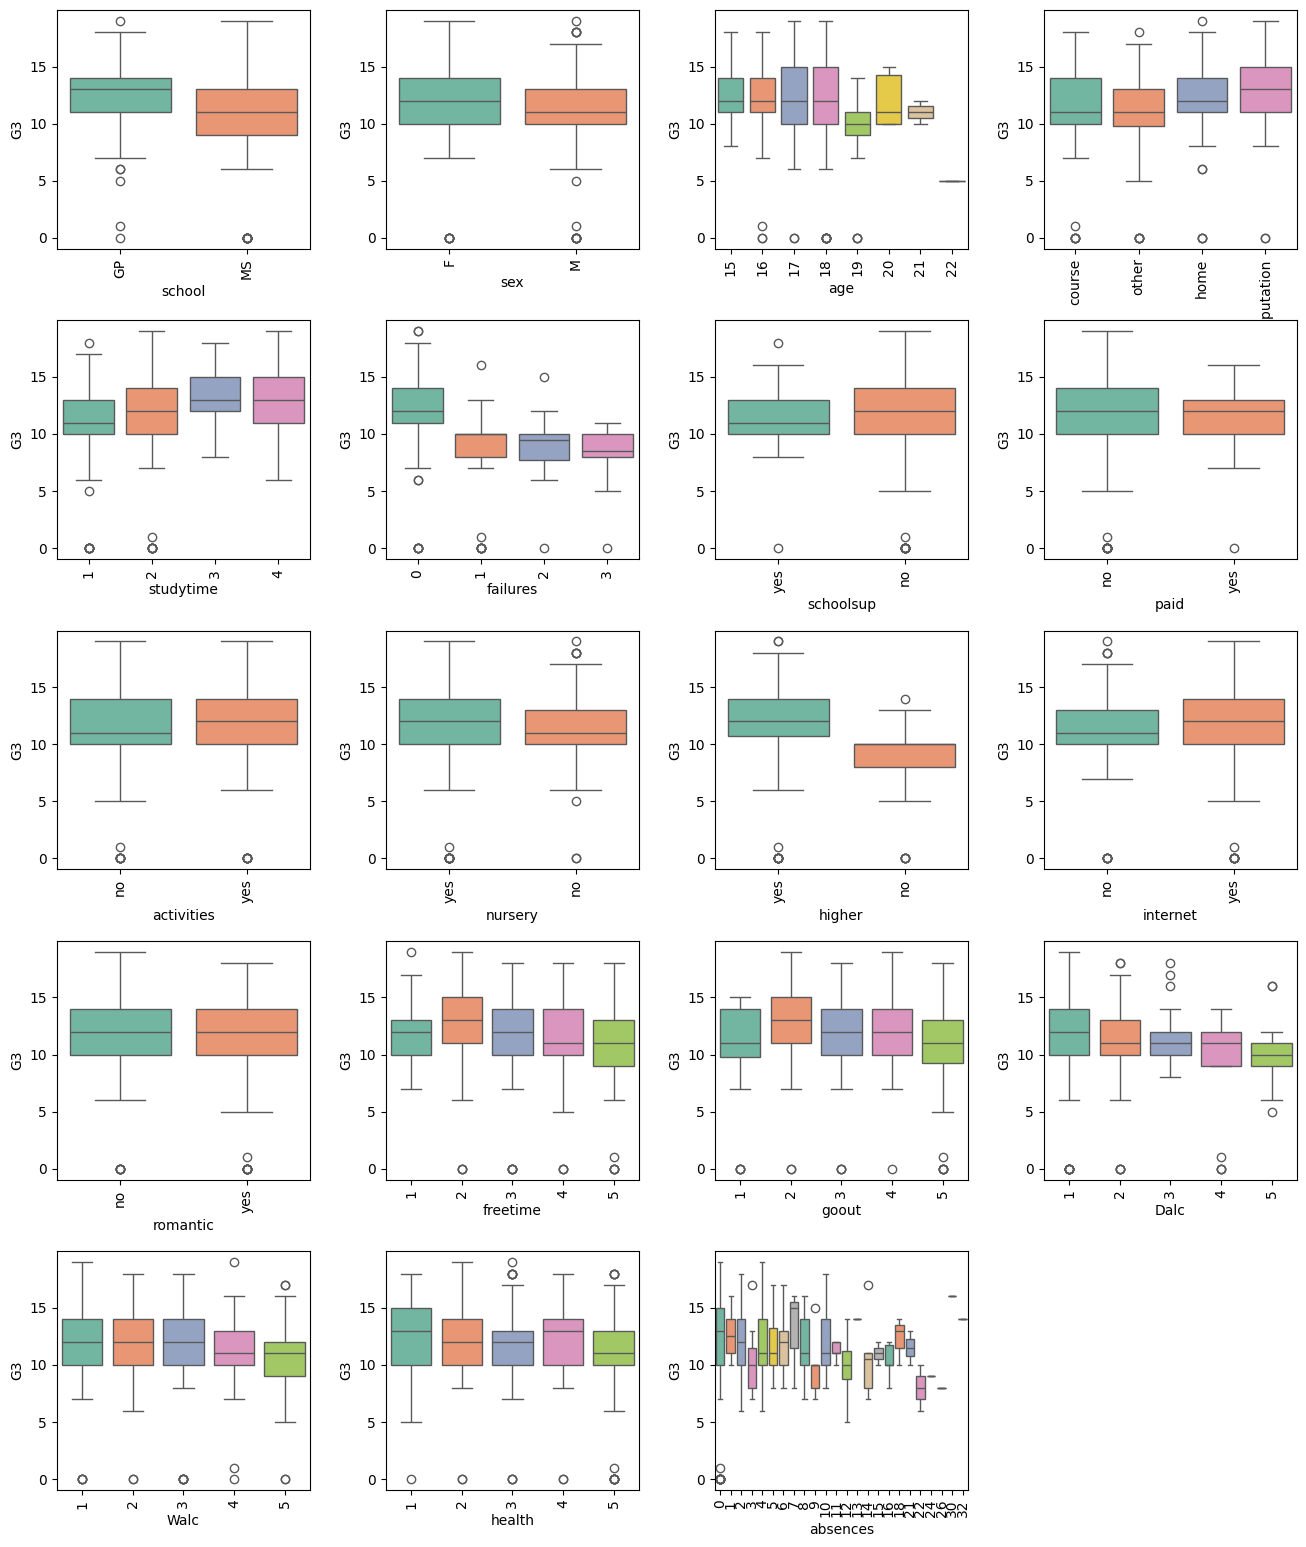

In [17]:
plt.figure(figsize = (16,20))
plt.subplots_adjust(left=None, right= None, bottom= None, top= 0.85, wspace=0.3, hspace=0.3)
for i,feature in enumerate(personal_features):
    plt.subplot(5,4,i+1)
    sns.boxplot(x = feature, y = 'G3', palette='Set2', data = student_data)
    plt.xticks(rotation = 90)
plt.savefig('figures/personal_features.png', dpi = 150)
plt.show()


## Outcome v.s. Family Features

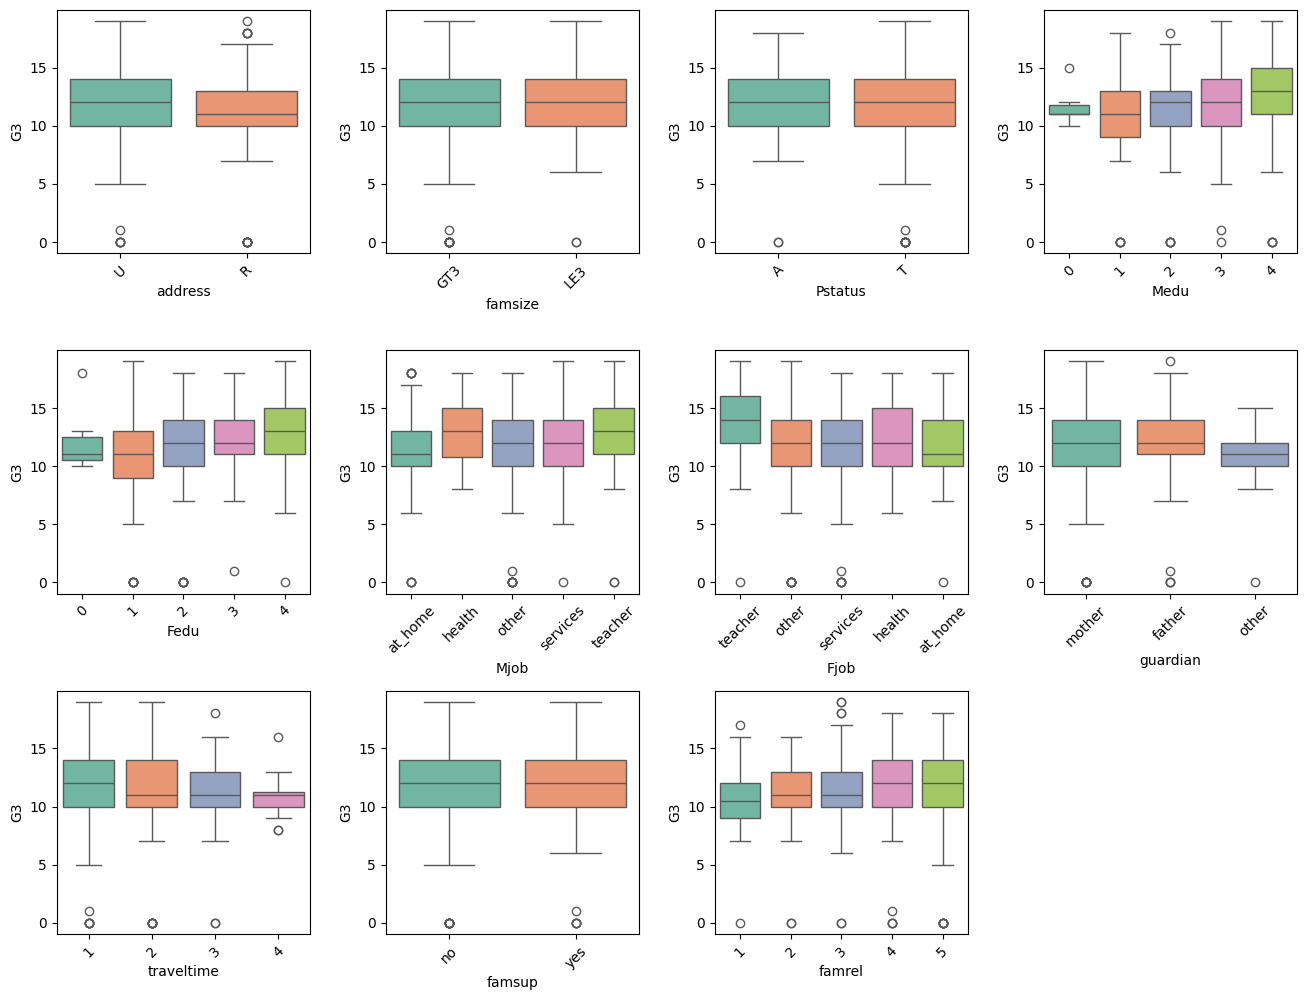

In [18]:
plt.figure(figsize = (16,12))
plt.subplots_adjust(left=None, right= None, bottom= None, top= None, wspace=0.3, hspace=0.4)
for i,feature in enumerate(family_features):
    plt.subplot(3,4,i+1)
    sns.boxplot(x = feature, y = 'G3', palette='Set2', data = student_data)
    plt.xticks(rotation = 45)
plt.savefig('figures/family_features.png', dpi = 150)
plt.show()

# Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel,RBF, ConstantKernel
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz  
import graphviz  

## Data Preparation

In [23]:
# split the data into training set and test set
student_data = pd.get_dummies(student_data)
X = student_data.drop(columns = 'G3', axis = 1)
y = student_data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Fitting

### Regression Tree

In [24]:
# build regression tree model
reg_tree = DecisionTreeRegressor(random_state=42, max_depth = 5, min_samples_leaf = 10).fit(X_train, y_train)

In [27]:
def model_evaluation(model, X, y_true):
    y_pred = model.predict(X)
    mse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    #mape = mean_absolute_percentage_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    scores = [round(x, 5) for x in [mse, mae,  r_squared]]  
    result = pd.DataFrame(scores, index = ['MSE', 'MAE', 'R2'], columns = ['value'])
    return result

In [28]:
# the performance on training set
model_evaluation(model = reg_tree, X = X_train, y_true = y_train)

,value
MSE,2.45555
MAE,1.88155
R2,0.42715


In [29]:
# the performance on test set
model_evaluation(model = reg_tree, X = X_test, y_true = y_test)

,value
MSE,2.96739
MAE,2.28019
R2,0.09704


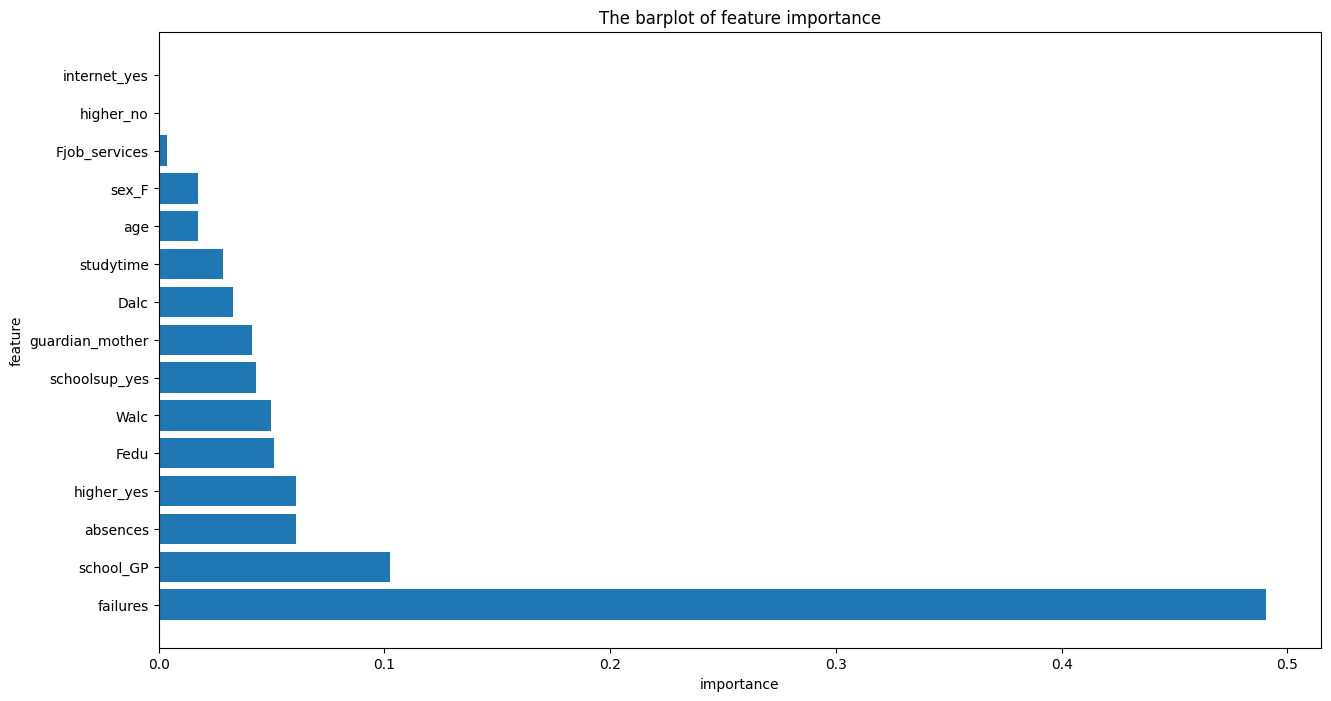

In [32]:
# plotting the feature importance
plt.figure(figsize = (15,8))
feature_imp_df = pd.DataFrame({'feature_name': X.columns, 'importance': reg_tree.feature_importances_})
feature_imp_df.sort_values(by = 'importance', ascending = False, inplace = True)
feature_imp_df = feature_imp_df.head(15)
plt.barh(feature_imp_df.feature_name, feature_imp_df.importance)
plt.title('The barplot of feature importance')
plt.ylabel('feature')
plt.xlabel('importance')
plt.savefig('figures/feature_importance_regression_tree.png', dpi = 150)
plt.show()

### XGBOOST

In [37]:
# build xgboost model
xgboost =  XGBRegressor(objective ='reg:squarederror',
                        random_state=42, max_depth = 5, min_samples_leaf = 10,
                       n_estimators = 500).fit(X_train, y_train)

In [38]:
# the performance on training set
model_evaluation(model = xgboost, X = X_train, y_true = y_train)

,value
MSE,0.00265
MAE,0.00136
R2,1.00000


In [39]:
# the performance on test set
model_evaluation(model = xgboost , X = X_test, y_true = y_test)

,value
MSE,2.75889
MAE,2.15162
R2,0.21947


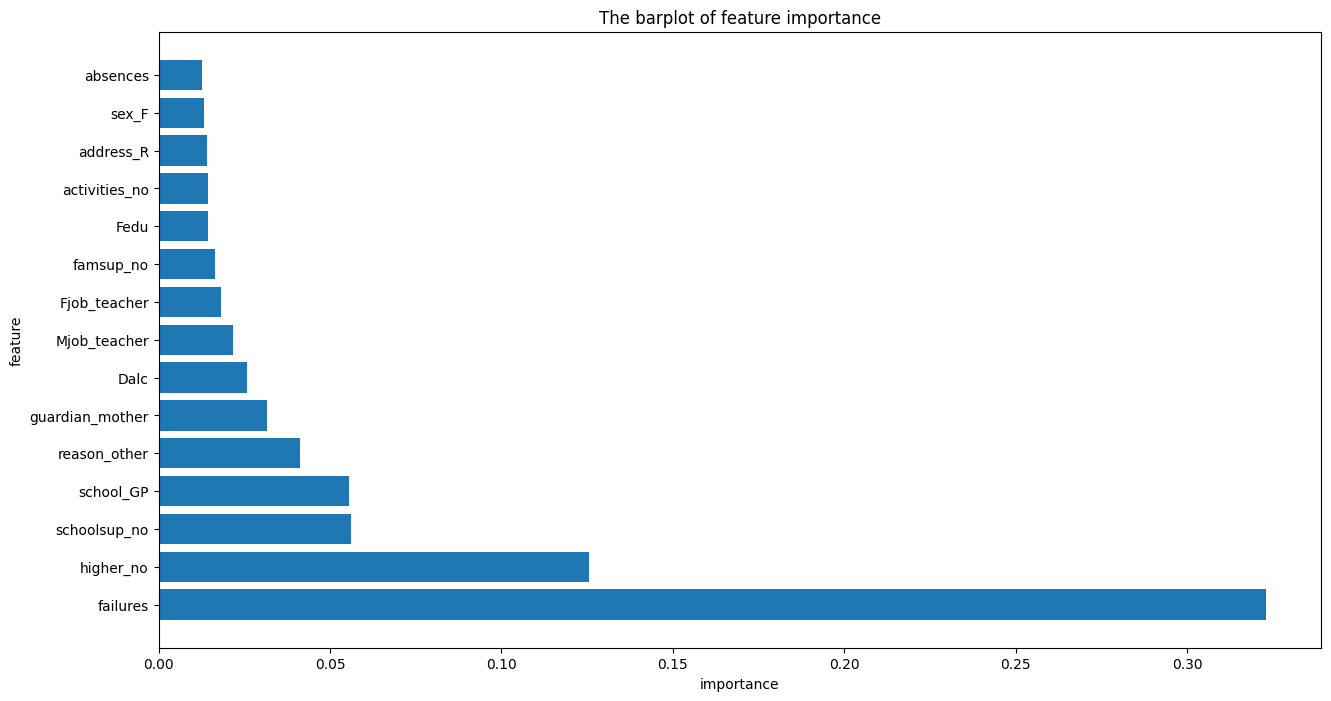

In [36]:
# plotting the feature importance
plt.figure(figsize = (15,8))
feature_imp_df = pd.DataFrame({'feature_name': X.columns, 'importance': xgboost.feature_importances_})
feature_imp_df.sort_values(by = 'importance', ascending = False, inplace = True)
feature_imp_df = feature_imp_df.head(15)
plt.barh(feature_imp_df.feature_name, feature_imp_df.importance)
plt.title('The barplot of feature importance')
plt.ylabel('feature')
plt.xlabel('importance')
plt.savefig('figures/feature_importance_xgboost.png', dpi = 150)
plt.show()

### MLP

In [41]:
# build a MLP model
mlp =  MLPRegressor(hidden_layer_sizes = 500, learning_rate_init = 0.001, random_state = 123) .fit(X_train, y_train)

In [42]:
# the performance on training set
model_evaluation(model = mlp, X = X_train, y_true = y_train)

,value
MSE,1.87993
MAE,1.35962
R2,0.66424


In [43]:
# the performance on test set
model_evaluation(model = mlp , X = X_test, y_true = y_test)

,value
MSE,2.92744
MAE,2.19092
R2,0.12119


### CNN

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
# standardize the data
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# transform the data into tensor 
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [43]:
# define a CNN Regression model
class CNNRegressor(nn.Module):
    def __init__(self):
        super(CNNRegressor, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(16 * (X_train.shape[1] // 2), 50)  
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * (X_train.shape[1] // 2))  
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Epoch [10/1000], Loss: 87.5728
Epoch [20/1000], Loss: 30.5550
Epoch [30/1000], Loss: 15.2318
Epoch [40/1000], Loss: 17.2185
Epoch [50/1000], Loss: 13.8752
Epoch [60/1000], Loss: 13.8461
Epoch [70/1000], Loss: 13.0776
Epoch [80/1000], Loss: 12.7083
Epoch [90/1000], Loss: 12.2663
Epoch [100/1000], Loss: 11.8803
Epoch [110/1000], Loss: 11.4903
Epoch [120/1000], Loss: 11.1158
Epoch [130/1000], Loss: 10.7494
Epoch [140/1000], Loss: 10.3941
Epoch [150/1000], Loss: 10.0502
Epoch [160/1000], Loss: 9.7199
Epoch [170/1000], Loss: 9.4051
Epoch [180/1000], Loss: 9.1073
Epoch [190/1000], Loss: 8.8302
Epoch [200/1000], Loss: 8.5749
Epoch [210/1000], Loss: 8.3408
Epoch [220/1000], Loss: 8.1292
Epoch [230/1000], Loss: 7.9392
Epoch [240/1000], Loss: 7.7705
Epoch [250/1000], Loss: 7.6220
Epoch [260/1000], Loss: 7.4911
Epoch [270/1000], Loss: 7.3754
Epoch [280/1000], Loss: 7.2737
Epoch [290/1000], Loss: 7.1831
Epoch [300/1000], Loss: 7.1017
Epoch [310/1000], Loss: 7.0284
Epoch [320/1000], Loss: 6.9618
Ep

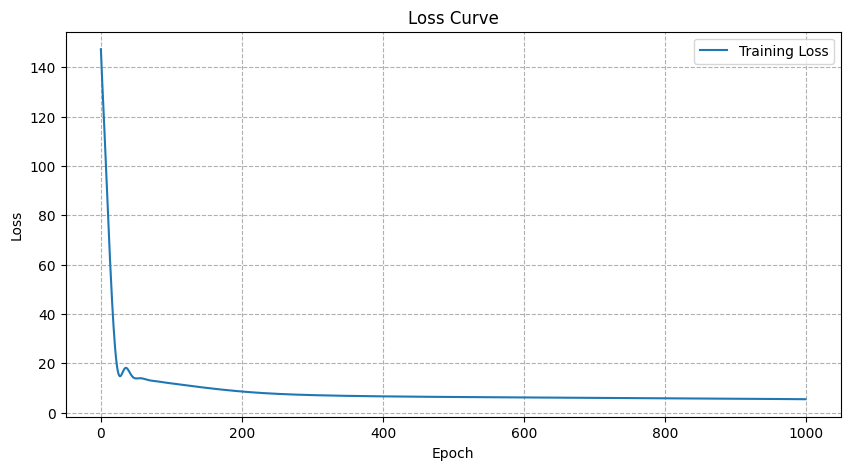

In [44]:
# train the model
model = CNNRegressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1000
train_losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor.unsqueeze(1))  
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, ls = '--')
plt.savefig('figures/CNN_loss', dpi = 150)
plt.show()

In [45]:
# evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor.unsqueeze(1))
    test_loss = criterion(predictions, y_test_tensor)
print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 8.4673


### DNN

In [46]:
# standardize the data
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# transform the data into tensor 
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [47]:
class DNNRegressor(nn.Module):
    def __init__(self, input_size):
        super(DNNRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [48]:
input_size = X_train_tensor.shape[1]  
model = DNNRegressor(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

Epoch [10/1000], Loss: 32.2820
Epoch [20/1000], Loss: 7.0225
Epoch [30/1000], Loss: 6.2499
Epoch [40/1000], Loss: 4.3642
Epoch [50/1000], Loss: 3.4206
Epoch [60/1000], Loss: 2.8337
Epoch [70/1000], Loss: 2.4490
Epoch [80/1000], Loss: 2.1751
Epoch [90/1000], Loss: 1.9491
Epoch [100/1000], Loss: 1.7609
Epoch [110/1000], Loss: 1.6077
Epoch [120/1000], Loss: 1.4722
Epoch [130/1000], Loss: 1.3478
Epoch [140/1000], Loss: 1.2336
Epoch [150/1000], Loss: 1.1244
Epoch [160/1000], Loss: 1.0243
Epoch [170/1000], Loss: 0.9349
Epoch [180/1000], Loss: 0.8533
Epoch [190/1000], Loss: 0.7808
Epoch [200/1000], Loss: 0.7167
Epoch [210/1000], Loss: 0.6604
Epoch [220/1000], Loss: 0.6095
Epoch [230/1000], Loss: 0.5629
Epoch [240/1000], Loss: 0.5200
Epoch [250/1000], Loss: 0.4805
Epoch [260/1000], Loss: 0.4448
Epoch [270/1000], Loss: 0.4132
Epoch [280/1000], Loss: 0.3840
Epoch [290/1000], Loss: 0.3576
Epoch [300/1000], Loss: 0.3334
Epoch [310/1000], Loss: 0.3109
Epoch [320/1000], Loss: 0.2900
Epoch [330/1000]

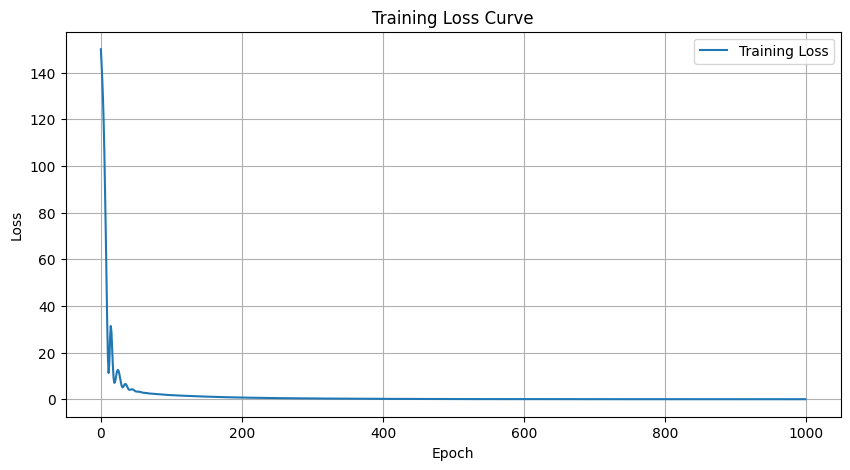

In [49]:
num_epochs = 1000
train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('figures/DNN_loss', dpi = 150)
plt.show()

In [50]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 12.6576
